# Data Prep

In [1]:
# Download your kaggle.json file from kaggle.com (go to your profile - settings...)
from google.colab import files
uploaded = files.upload()

Saving VectorLifeCycle.png to VectorLifeCycle.png


In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d pybear/cats-vs-dogs

100% 784M/788M [00:08<00:00, 47.4MB/s]
100% 788M/788M [00:08<00:00, 92.0MB/s]


In [ ]:
!unzip cats-vs-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [ ]:
# Identify any bad images
import os
from PIL import Image

def validate_images(directory):
    corrupted_files = []

    # Walk through directory and sub-directories
    for dirpath, _, filenames in os.walk(directory):
        print(f"Scanning directory: {dirpath}")

        for image_file in filenames:
            # Check for common image extensions
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(dirpath, image_file)
                try:
                    with Image.open(image_path) as img:
                        img.verify()
                except Exception as e:
                    corrupted_files.append(image_path)
                    print(f"Error with {image_path}: {e}")

    return corrupted_files

# Example usage:
directory = "PetImages"  # Make sure to change to YOUR directory!
corrupted_images = validate_images(directory)
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
else:
    print("All images are valid!")

Scanning directory: PetImages
Scanning directory: PetImages/Dog


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error with PetImages/Dog/11702.jpg: cannot identify image file 'PetImages/Dog/11702.jpg'
Scanning directory: PetImages/Cat
Error with PetImages/Cat/666.jpg: cannot identify image file 'PetImages/Cat/666.jpg'
Found 2 corrupted images.


In [ ]:
import os
from PIL import Image

def validate_images(directory, delete_corrupted=False):
    corrupted_files = []

    # Walk through directory and sub-directories
    for dirpath, _, filenames in os.walk(directory):
        print(f"Scanning directory: {dirpath}")

        for image_file in filenames:
            # Check for common image extensions
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(dirpath, image_file)
                try:
                    with Image.open(image_path) as img:
                        img.verify()
                except Exception as e:
                    corrupted_files.append(image_path)
                    print(f"Error with {image_path}: {e}")
                    if delete_corrupted:
                        try:
                            os.remove(image_path)
                            print(f"Deleted corrupted file: {image_path}")
                        except Exception as del_error:
                            print(f"Error deleting {image_path}: {del_error}")

    return corrupted_files

# Example usage:
directory = "PetImages"  # Make sure to change to YOUR directory!

# First scan and delete corrupted images
corrupted_images = validate_images(directory, delete_corrupted=True)
if corrupted_images:
    print(f"\nFound and deleted {len(corrupted_images)} corrupted images.")
    print("List of corrupted images (deleted):")
    for img in corrupted_images:
        print(img)
else:
    print("All images are valid!")

# Second scan to confirm
print("\nRunning a second scan to confirm...")
corrupted_images_second_scan = validate_images(directory)
if corrupted_images_second_scan:
    print(f"\nStill found {len(corrupted_images_second_scan)} corrupted images.")
    print("List of corrupted images (still present):")
    for img in corrupted_images_second_scan:
        print(img)
else:
    print("All images are valid!")


Scanning directory: PetImages
Scanning directory: PetImages/Dog
Error with PetImages/Dog/11702.jpg: cannot identify image file 'PetImages/Dog/11702.jpg'
Deleted corrupted file: PetImages/Dog/11702.jpg
Scanning directory: PetImages/Cat
Error with PetImages/Cat/666.jpg: cannot identify image file 'PetImages/Cat/666.jpg'
Deleted corrupted file: PetImages/Cat/666.jpg

Found and deleted 2 corrupted images.
List of corrupted images (deleted):
PetImages/Dog/11702.jpg
PetImages/Cat/666.jpg

Running a second scan to confirm...
Scanning directory: PetImages
Scanning directory: PetImages/Dog
Scanning directory: PetImages/Cat
All images are valid!


In [ ]:
!ls PetImages/

Cat  Dog


In [ ]:
!ls PetImages/Cat | wc -l
# Number of images in the Cat folder

12500


In [ ]:
!ls PetImages/Dog | wc -l
# Number of images in the Dog

12500


In [ ]:
import os
import random
import pathlib
import shutil
import matplotlib.pyplot as plt

In [ ]:
# Distinct image classes
img_classes = ['cat', 'dog']

# Folders for training, testing, and validation subsets
dir_data  = pathlib.Path.cwd().joinpath('data')
dir_train = dir_data.joinpath('train')
dir_valid = dir_data.joinpath('validation')
dir_test  = dir_data.joinpath('test')

# Train/Test/Validation split config
pct_train = 0.8
pct_valid = 0.1
pct_test = 0.1

In [ ]:
def setup_folder_structure() -> None:
    # Create base folders if they don't exist
    if not dir_data.exists():  dir_data.mkdir()
    if not dir_train.exists(): dir_train.mkdir()
    if not dir_valid.exists(): dir_valid.mkdir()
    if not dir_test.exists():  dir_test.mkdir()

    # Create subfolders for each class
    for cls in img_classes:
        if not dir_train.joinpath(cls).exists(): dir_train.joinpath(cls).mkdir()
        if not dir_valid.joinpath(cls).exists(): dir_valid.joinpath(cls).mkdir()
        if not dir_test.joinpath(cls).exists():  dir_test.joinpath(cls).mkdir()

    # Print the directory structure
    # Credits - https://stackoverflow.com/questions/3455625/linux-command-to-print-directory-structure-in-the-form-of-a-tree
    dir_str = os.system('''ls -R data | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/' ''')
    print(dir_str)
    return


setup_folder_structure()

0


In [ ]:
# take the data from PetImages (or whatever you have)... and load it into the new directories
def train_test_validation_split(src_folder: pathlib.PosixPath, class_name: str) -> dict:
    # For tracking
    n_train, n_valid, n_test = 0, 0, 0

    # Random seed for reproducibility
    random.seed(42)

    # Iterate over every image
    for file in src_folder.iterdir():
        img_name = str(file).split('/')[-1]

        # Make sure it's JPG
        if file.suffix == '.jpg':
            # Generate a random number
            x = random.random()

            # Where should the image go?
            tgt_dir = ''

            # .80 or below
            if x <= pct_train:
                tgt_dir = 'train'
                n_train += 1

            # Between .80 and .90
            elif pct_train < x <= (pct_train + pct_valid):
                tgt_dir = 'validation'
                n_valid += 1

            # Above .90
            else:
                tgt_dir = 'test'
                n_test += 1

            # Copy the image
            shutil.copy(
                src=file,
                # data/<train|valid|test>/<cat\dog>/<something>.jpg
                dst=f'{str(dir_data)}/{tgt_dir}/{class_name}/{img_name}'
            )

    return {
        'source': str(src_folder),
        'target': str(dir_data),
        'n_train': n_train,
        'n_validaiton': n_valid,
        'n_test': n_test
    }

In [ ]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('PetImages/Cat'),
    class_name='cat'
)

CPU times: user 660 ms, sys: 1.37 s, total: 2.03 s
Wall time: 2.15 s


{'source': '/content/PetImages/Cat',
 'target': '/content/data',
 'n_train': 10015,
 'n_validaiton': 1239,
 'n_test': 1245}

In [ ]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('PetImages/Dog'),
    class_name='dog'
)

CPU times: user 663 ms, sys: 1.56 s, total: 2.23 s
Wall time: 2.37 s


{'source': '/content/PetImages/Dog',
 'target': '/content/data',
 'n_train': 10015,
 'n_validaiton': 1239,
 'n_test': 1245}

In [ ]:
def plot_random_sample(img_dir: pathlib.PosixPath):
    # How many images we're showing
    n = 10
    # Get absolute paths to these N images
    imgs = random.sample(list(img_dir.iterdir()), n)

    # Make sure num_row * num_col = n
    num_row = 2
    num_col = 5

    # Create a figure
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = plt.imread(str(imgs[i]))
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        # Set title as <train|test|validation>/<cat\dog>/<img_name>.jpg
        ax.set_title('/'.join(str(imgs[i]).split('/')[-3:]))

    plt.tight_layout()
    plt.show()

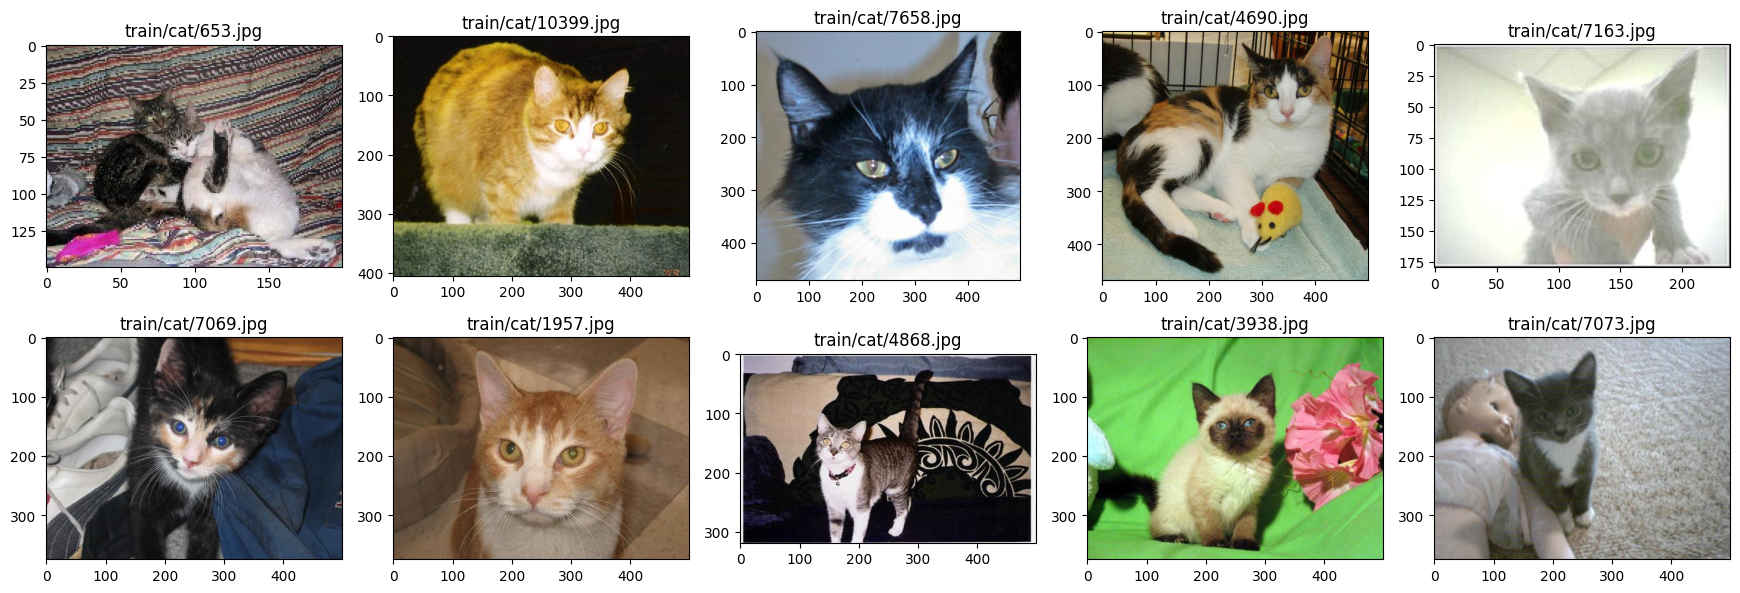

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data/train/cat'))

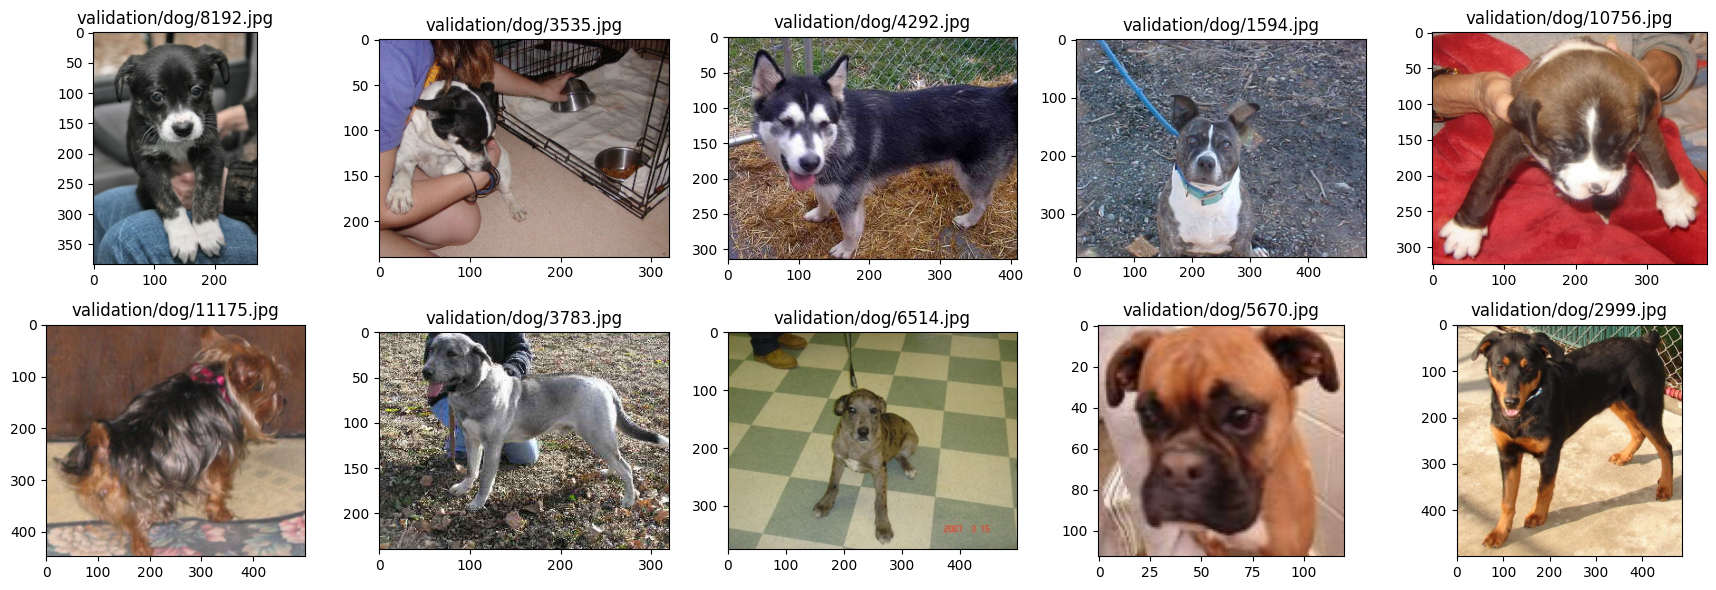

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data/validation/dog'))

# Build a CNN

In [ ]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

(281, 300, 3)


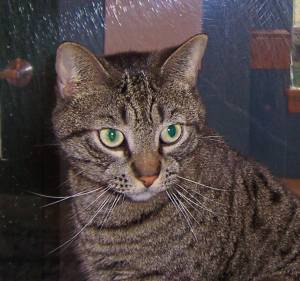

In [ ]:
img1 = Image.open('data/train/cat/1.jpg')
print(np.array(img1).shape)
display(img1)

(375, 500, 3)


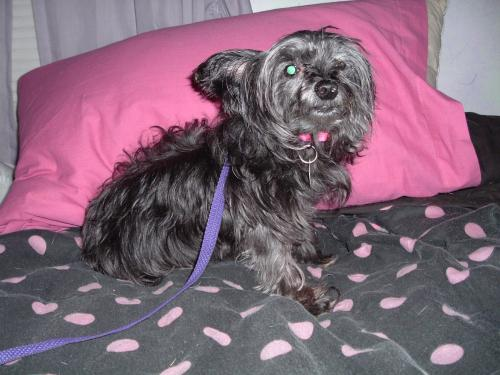

In [ ]:
img2 = Image.open('data/train/dog/0.jpg')
print(np.array(img2).shape)
display(img2)

In [ ]:
np.array(img2).shape

(375, 500, 3)

In [ ]:
np.array(img2)

array([[[117, 115, 126],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [132, 132, 142],
        [131, 131, 141],
        [131, 131, 141]],

       [[118, 116, 127],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [134, 134, 144],
        [133, 133, 143],
        [133, 133, 143]],

       [[119, 117, 128],
        [118, 116, 127],
        [120, 118, 131],
        ...,
        [136, 136, 146],
        [135, 135, 145],
        [135, 135, 145]],

       ...,

       [[ 75,  80,  84],
        [ 70,  75,  79],
        [ 69,  74,  78],
        ...,
        [ 74,  82,  85],
        [ 70,  78,  81],
        [ 67,  75,  78]],

       [[ 74,  79,  83],
        [ 68,  73,  77],
        [ 65,  70,  74],
        ...,
        [ 66,  74,  77],
        [ 67,  75,  78],
        [ 68,  76,  79]],

       [[ 70,  75,  79],
        [ 67,  72,  76],
        [ 66,  71,  75],
        ...,
        [ 69,  77,  80],
        [ 67,  75,  78],
        [ 65,  73,  76]]

In [ ]:
np.array(img2) / 255.0

array([[[0.45882353, 0.45098039, 0.49411765],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.51764706, 0.51764706, 0.55686275],
        [0.51372549, 0.51372549, 0.55294118],
        [0.51372549, 0.51372549, 0.55294118]],

       [[0.4627451 , 0.45490196, 0.49803922],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.5254902 , 0.5254902 , 0.56470588],
        [0.52156863, 0.52156863, 0.56078431],
        [0.52156863, 0.52156863, 0.56078431]],

       [[0.46666667, 0.45882353, 0.50196078],
        [0.4627451 , 0.45490196, 0.49803922],
        [0.47058824, 0.4627451 , 0.51372549],
        ...,
        [0.53333333, 0.53333333, 0.57254902],
        [0.52941176, 0.52941176, 0.56862745],
        [0.52941176, 0.52941176, 0.56862745]],

       ...,

       [[0.29411765, 0.31372549, 0.32941176],
        [0.2745098 , 0.29411765, 0.30980392],
        [0.27058824, 0

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20030 images belonging to 2 classes.


In [ ]:
first_batch = train_data.next()

In [ ]:
first_batch[0].shape, first_batch[1].shape

((64, 224, 224, 3), (64, 2))

In [ ]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 64
    num_row, num_col = 8, 8
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))

    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()


visualize_batch(batch=first_batch)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20030 images belonging to 2 classes.
Found 2478 images belonging to 2 classes.


# Train the CNN

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 379s 1s/step - loss: 0.7126 - accuracy: 0.6537 - val_loss: 0.5859 - val_accuracy: 0.7022
Epoch 2/10
313/313 [==============================] - 373s 1s/step - loss: 0.4782 - accuracy: 0.7728 - val_loss: 0.5771 - val_accuracy: 0.7115
Epoch 3/10
313/313 [==============================] - 368s 1s/step - loss: 0.3048 - accuracy: 0.8719 - val_loss: 0.6908 - val_accuracy: 0.7131
Epoch 4/10
313/313 [==============================] - 393s 1s/step - loss: 0.1564 - accuracy: 0.9469 - val_loss: 0.8192 - val_accuracy: 0.7094
Epoch 5/10
313/313 [==============================] - 387s 1s/step - loss: 0.0751 - accuracy: 0.9800 - val_loss: 0.9360 - val_accuracy: 0.7268
Epoch 6/10
313/313 [==============================] - 366s 1s/step - loss: 0.0378 - accuracy: 0.9920 - val_loss: 1.0799 - val_accuracy: 0.7280
Epoch 7/10
313/313 [==============================] - 379s 1s/step - loss: 0.0266 - accuracy: 0.9949 - val_loss: 1.2128 - val_accuracy: 0.7171

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

# Define callbacks
callbacks = [
    # Save the model's weights every epoch
    ModelCheckpoint(filepath='model_1_checkpoint_weights.h5',
                    save_weights_only=True,
                    save_best_only=True,
                    monitor='val_loss',
                    verbose=1),

    # Stop training when the validation loss stops improving for 3 epochs
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),

    # Reduce learning rate when validation loss stops improving for 2 epochs
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),

    # TensorBoard logs
    TensorBoard(log_dir='./logs')
]

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=callbacks  # Add the callbacks parameter here
)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_3 = model_3.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

# Make Predictions on New Images

In [ ]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size=(224, 224))
    return np.array(img) / 255.0

In [ ]:
single_image = prepare_single_image(img_path='data/test/cat/10013.jpg')
single_prediction = model_1.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

1/1 [==============================] - 0s 130ms/step


array([[7.8613539e-06, 9.9999213e-01]], dtype=float32)

In [ ]:
single_prediction.argmax()

1

In [ ]:
num_total_cat, num_correct_cat = 0, 0
num_total_dog, num_correct_dog = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/cat').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_1.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_cat += 1
        if pred == 0:
            num_correct_cat += 1
    except Exception as e:
        continue

for img_path in pathlib.Path.cwd().joinpath('data/test/dog').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_1.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_dog += 1
        if pred == 1:
            num_correct_dog += 1
    except Exception as e:
        continue

1/1 [==============================] - 0s 27ms/step


In [ ]:
num_total_cat

1241

In [ ]:
# Accuracy
num_correct_cat / num_total_cat

0.7961321514907332

# More Complex CNN Model

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy

tf.random.set_seed(42)
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42
)

Found 20030 images belonging to 2 classes.
Found 2478 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=2, activation='softmax')
])


model_1.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=[BinaryAccuracy(name='accuracy')]
)
model_1_history = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

This results in about 74% Accuracy

In [ ]:
model_2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=2, activation='softmax')
])


model_2.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=[BinaryAccuracy(name='accuracy')]
)
model_2_history = model_2.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

69% Accuracy

In [ ]:
model_3 = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=128),
    Dense(units=2, activation='softmax')
])

model_3.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

model_3_history = model_3.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
626/626 [==============================] - 5145s 8s/step - loss: 0.6951 - accuracy: 0.6429 - val_loss: 0.5560 - val_accuracy: 0.7236
Epoch 2/10
626/626 [==============================] - 5026s 8s/step - loss: 0.4920 - accuracy: 0.7652 - val_loss: 0.4885 - val_accuracy: 0.7639
Epoch 3/10
626/626 [==============================] - 5085s 8s/step - loss: 0.3852 - accuracy: 0.8277 - val_loss: 0.4907 - val_accuracy: 0.7845
Epoch 4/10
626/626 [==============================] - 5039s 8s/step - loss: 0.2159 - accuracy: 0.9129 - val_loss: 0.5920 - val_accuracy: 0.7550
Epoch 5/10
408/626 [==================>...........] - ETA: 27:43 - loss: 0.0831 - accuracy: 0.9710